# BERT

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 30.7 MB/s 
     |████████████████████████████████| 596 kB 57.4 MB/s 
     |████████████████████████████████| 6.6 MB 48.9 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
!pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 574 kB 32.4 MB/s 
     |████████████████████████████████| 175 kB 70.4 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=d50ea31e22d69847be4c7f15ad6adb604d2c79dfd0637db1e608aba719f52912
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [3]:
!pip install sklearn_crfsuite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 965 kB 44.8 MB/s 


In [4]:
!pip install -U 'scikit-learn<0.24'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 32.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.


In [5]:
! pip install natasha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.4 MB 1.6 MB/s 
     |████████████████████████████████| 55 kB 4.1 MB/s 
     |████████████████████████████████| 41 kB 134 kB/s 
     |████████████████████████████████| 49 kB 6.6 MB/s 
     |████████████████████████████████| 8.2 MB 20.9 MB/s 
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26119 sha256=df66d2c30a59002e46deaec6a9db79350ff7cbb67935b7af64b28b308596c9e4
  Stored in directory: /root/.cache/pip/wheels/16/85/bd/1001cbb46dcfb71c2001cd7401c6fb250392f22a81ce3722f7
Successfully built intervaltree
  Attempting uninstall: intervaltree
    Found existing installation: intervaltree 2.1.0
    Uninstalling intervaltree-2.1.0:
      Successfully uninstalled intervaltree-2.1.0


In [6]:
import os
import pandas as pd
import re
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tqdm.notebook import tqdm
import nltk
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from collections import defaultdict
from textwrap import wrap

nltk.download('punkt')

import stanza
from collections import defaultdict
from tqdm.notebook import tqdm
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from sklearn.model_selection import cross_val_score
from collections import Counter
import seaborn as sns
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)

segmenter = Segmenter()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Загружаем модель

In [7]:
PRE_TRAINED_MODEL_NAME = "bert-base-multilingual-cased"

In [8]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

### Готовим данные

In [9]:
sents_data = pd.read_csv('sents_Wiki_tagged.csv', dtype={'sent_index': str, 'sent_text': str, 'def': int}, sep=';')
sents_data = sents_data.rename(columns = {'def' : 'has_def'}) 

In [10]:
shuffle =  sents_data.sample(frac=1).reset_index(drop=True) 

In [11]:
sents_data = shuffle[:750]
sents_data_test = shuffle[750:]

### Смотрим на данные

In [12]:
sents_data.head()

,Unnamed: 0,sent_index,sent_text,has_def
0,581,185,В рассказе Станислава Лема «Как Эрг Самовозбуд...,0
1,262,8644,Термин «Звонкие согласные» используется в фоне...,1
2,510,7,Лингвистика изучает не только существующие (су...,0
3,317,11978,Сино́нимы (от др.-греч. σύν «вместе» + ὄνυμα —...,1
4,222,5863,"Вариа́нтность (лат. varians, род. variantis — ...",1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


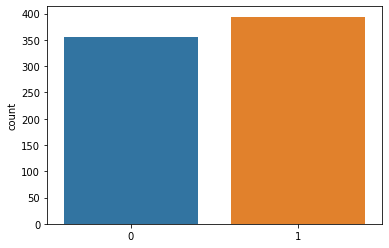

In [13]:
sns.countplot(list(sents_data['has_def']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


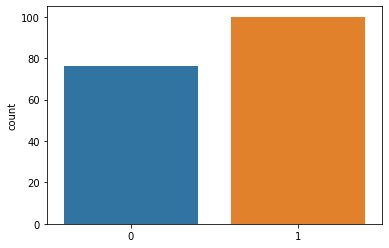

In [14]:
sns.countplot(list(sents_data_test['has_def']))

In [15]:
from statistics import mean
lens = [len(i.split(' ')) for i in list(sents_data['sent_text'])]
mean(lens)

21.897333333333332

### Датасет

In [16]:
class SentsDataset(Dataset):

  def __init__(self, sents, targets, tokenizer, max_len):
    self.sents = sents
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.sents)
  
  def __getitem__(self, item):
    sent = str(self.sents[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      sent,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      padding='max_length',
      return_attention_mask=True,
      return_tensors='pt',
      truncation=True
    )

    return {
      'sent_text':sent,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [17]:
RANDOM_SEED = 1
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [18]:
df_train, df_test = train_test_split(sents_data, test_size=0.1, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(sents_data_test, test_size=0.5, random_state=RANDOM_SEED)

In [19]:
MAX_LEN = 128

### DataLoader

In [20]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = SentsDataset(
    sents=df.sent_text.to_numpy(),
    targets=df.has_def.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=1
  )

In [21]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [22]:
data = next(iter(train_data_loader))
data.keys()

dict_keys(['sent_text', 'input_ids', 'attention_mask', 'targets'])

### Класс SentsClassifier

In [23]:
class SentsClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentsClassifier, self).__init__()
    self.bert = BertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME)
  
  def forward(self, input_ids, attention_mask):
    output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,
      return_dict=False)
    return output[0]

In [24]:
model = SentsClassifier(2)
model = model.to(device)

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

#### Смотрим метрики

In [25]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  sent_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["sent_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      sent_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return sent_texts, predictions, prediction_probs, real_values

In [26]:
y_sent_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

In [27]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.57      0.22      0.32        36
           1       0.62      0.88      0.73        52

    accuracy                           0.61        88
   macro avg       0.60      0.55      0.53        88
weighted avg       0.60      0.61      0.56        88



#### Тестируем на каком-либо предложении

In [28]:
def predict(model, sentence):
    encoded_text = tokenizer.encode_plus(
        sentence,
        max_length=MAX_LEN,
        add_special_tokens=True,
        return_token_type_ids=False,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt',
        truncation=True)
    input_ids = encoded_text['input_ids'].to(device)
    attention_mask = encoded_text['attention_mask'].to(device)

    output = model(input_ids, attention_mask)
    prediction = torch.argmax(output, dim=1)

    return prediction.cpu().numpy()[0]

In [29]:
predict(model, 'Любовь - это великое искусство.')

0

### Обучаем на наших данных

In [30]:
EPOCHS = 10

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [31]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [32]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      
      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [33]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'bms_multiling_cased_10.bin')
    best_accuracy = val_acc

Epoch 1/10
----------
Train loss 0.42404392803477686 accuracy 0.8118518518518518
Val loss 0.1577753834426403 accuracy 0.9772727272727273

Epoch 2/10
----------
Train loss 0.2296362418768018 accuracy 0.9333333333333332
Val loss 0.27110258241494495 accuracy 0.9204545454545455

Epoch 3/10
----------
Train loss 0.2141141790333529 accuracy 0.9422222222222222
Val loss 0.17038919450715184 accuracy 0.9545454545454546

Epoch 4/10
----------
Train loss 0.12912823104971025 accuracy 0.9688888888888888
Val loss 0.19631094920138517 accuracy 0.9431818181818182

Epoch 5/10
----------
Train loss 0.06325786888902617 accuracy 0.9866666666666666
Val loss 0.2204380624461919 accuracy 0.9545454545454546

Epoch 6/10
----------
Train loss 0.03848682055358103 accuracy 0.991111111111111
Val loss 0.3063102913632368 accuracy 0.9318181818181819

Epoch 7/10
----------
Train loss 0.02010615482969686 accuracy 0.9970370370370369
Val loss 0.2074669005620914 accuracy 0.9431818181818182

Epoch 8/10
----------
Train loss 0

#### Смотрим метрики

In [34]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

0.9318181818181819

Ура! Выглядит неплохо...

In [35]:
y_sent_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

In [36]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        36
           1       0.96      0.92      0.94        52

    accuracy                           0.93        88
   macro avg       0.93      0.93      0.93        88
weighted avg       0.93      0.93      0.93        88



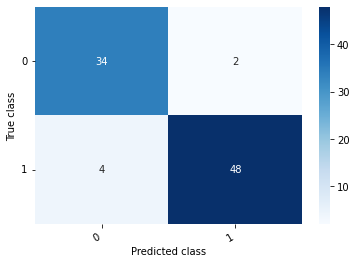

In [45]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True class')
  plt.xlabel('Predicted class');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])
show_confusion_matrix(df_cm)

#### Тестируем на каком-либо предложении

In [38]:
predict(model, 'Лингивстика - это наука о языках, изучающая их как систему.')

1

# CRF без эмбеддингов

In [ ]:
from sklearn.model_selection import train_test_split
import stanza
from collections import defaultdict
from tqdm.notebook import tqdm
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from sklearn.model_selection import cross_val_score
from collections import Counter
import pandas as pd
import seaborn as sns
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)

segmenter = Segmenter()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

### Готовим файлы

In [ ]:
df_sents = pd.read_csv('sents_Wiki_tagged.csv', dtype={'sent_index': str, 'sent_text': str, 'def': int}, sep=';')
sents_filtered = df_sents[df_sents['def'] > 0]
sents = list(sents_filtered['sent_text'])
ids = list(sents_filtered['sent_index'])

In [ ]:
train_sents, dev_sents, train_ids, dev_ids = train_test_split(sents, ids)

In [ ]:
df_tokens = pd.read_csv('tokens_Wiki_tagged.csv', dtype={'sent_index': str, 'token': str, 'tag': str}, sep=';')
tokens_filtered = df_tokens[df_tokens['sent_index'].isin(ids)]
tokens = list(tokens_filtered['token'])
t_ids = list(tokens_filtered['sent_index'])

In [ ]:
def bio_sents(sents_ids, tokens_df):
    bio_sents = {}
    for i in sents_ids:
        bio_sents[i] = list(tokens_df.loc[tokens_df['sent_index']==i]['tag'])
    return bio_sents

In [ ]:
bio_sents_train = bio_sents(train_ids, df_tokens)
bio_sents_test = bio_sents(dev_ids, df_tokens)

In [ ]:
def word2features(sent, i):
    word = sent[i].text
    postag = sent[i].pos
    
    features = {
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
    }
    if i > 0:
        word1 = sent[i-1].text
        postag1 = sent[i-1].pos
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
        })
    else:
        features['BOS'] = True
        
    if i < len(sent)-1:
        word1 = sent[i+1].text
        postag1 = sent[i+1].pos
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True
                
    return features


def text2features(text):
    doc = Doc(text)
    sentences = doc.segment(segmenter)
    m = doc.tag_morph(morph_tagger)
    toks = []
    for tok in doc.tokens:
        toks.append(tok)
    return [word2features(toks, i) for i in range(len(toks))]

def text2labels(text_ids, labels):
    return [labels[i] for i in text_ids]

def text2tokens(text):
    doc = Doc(text)
    sentences = doc.segment(segmenter)
    toks = []
    for sent in sentences:
      for tok in doc.tokens:
        toks.append(tok)
    return toks

In [ ]:
X_train = [text2features(s) for s in train_sents]
y_train = text2labels(train_ids, bio_sents_train)

X_test = [text2features(s) for s in dev_sents]
y_test = text2labels(dev_ids, bio_sents_test)

### Запускаем CRF

In [ ]:
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs', 
    c1=0.1, 
    c2=0.1, 
    max_iterations=100, 
    all_possible_transitions=True
)
crf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100)

### Смотрим метрики

In [ ]:
labels = list(crf.classes_)
labels.remove('O')
y_pred = crf.predict(X_test)
metrics.flat_f1_score(y_test, y_pred, 
                      average='weighted', labels=labels)

0.9117123383255811

In [ ]:
sorted_labels = sorted(
    labels, 
    key=lambda name: (name[1:], name[0])
)
print(metrics.flat_classification_report(
    y_test, y_pred, labels=sorted_labels, digits=3
))

              precision    recall  f1-score   support

       B-DEF      0.847     0.859     0.853       135
       I-DEF      0.923     0.953     0.938      2312
      B-TERM      0.958     0.772     0.855       149
      I-TERM      0.876     0.497     0.634       157

   micro avg      0.919     0.912     0.916      2753
   macro avg      0.901     0.770     0.820      2753
weighted avg      0.918     0.912     0.912      2753



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['B-DEF', 'I-DEF', 'B-TERM', 'I-TERM'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Как-то без эмбеддингов всё грустно.

### Тестируем на каком-либо предложении

In [ ]:
crf.predict(text2features(s) for s in ['Любовь - это великое искусство.'])

[['B-TERM', 'O', 'O', 'B-DEF', 'I-DEF', 'O']]

# Тестируем всё вместе на каком-либо предложении

In [ ]:
def predict_labels(inp):
    cls = predict(model, inp)
    if cls == 0:
        return 'Терминов и определений нет'
    else:
        return crf.predict(text2features(s) for s in [inp])

In [ ]:
predict_labels('В нынешнем виде это слово зафиксировано на польском языке в XV веке.')

'Терминов и определений нет'

In [ ]:
predict_labels('Стяже́ние (контракция) — слияние двух смежных гласных в один гласный или в дифтонг.')

[['B-TERM',
  'O',
  'B-TERM',
  'O',
  'O',
  'B-DEF',
  'I-DEF',
  'I-DEF',
  'I-DEF',
  'I-DEF',
  'I-DEF',
  'I-DEF',
  'I-DEF',
  'I-DEF',
  'I-DEF',
  'O']]

Кажется, неплохо!